# ***Image Segmentation Using K-means and DBSCAN***.<br>
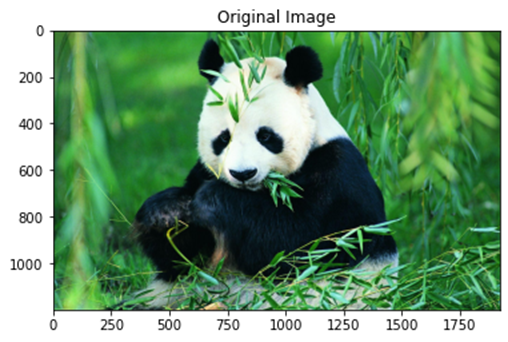<br>
K-means and DBSCAN are clustering algorithms, which we apply for color segmentation in images.<br>

### ***k-means***
tries to find a color representatives for a number of classes given, i.e., most average color for each class, which is most similar to the colors within the class but as different as possible from colors in other classes.

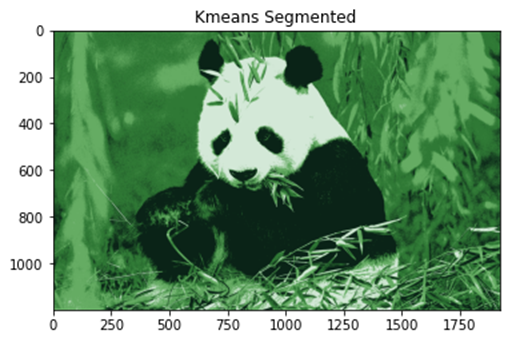

K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in three steps. Let’s see what are these three steps.

    Select the k values.
    Initialize the centroids.
    Select the group and find the average.


### ***DBSCAN*** 
is so called density-based clustering algorithm, which tries to group similar colors into different classes based on how densely they are positioned.

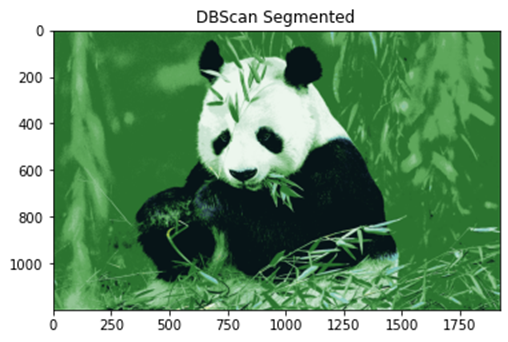

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

# Files
   `clustering_algorithms.py` - Container for Kmeans and DBScan   
   `logger.txt` - contains clustering information for pictures<br>
   `Images/x.jpg` - Images used for segmentation, Custom Image Feeding is possible with browse through.

# Dependencies
   All packages/libraries should be included in Python 3.8.8

# Limitations
   Image generation with works only for 3 or 4 channel models i.e. RGB (.jpg) or RGBA (.png).<br>
   Kernal sensitive to qt background process -> may get killed often -> soln restart the kernal. 

# Format
   k-means and dbscan use following format string (string of 3 dimensional array of size [x,y,n]):
   
    [[[n0,n1,n2,...],[n0,n1,n2,...]],[[n0,n1,n2,...],[n0,n1,n2,...]],...]  

# Copyright
   All the images i  `Images/*` were taken from internet and therefore belong to their respective owners.<br>
   Algorithms were not invented by me, I merely just implemented them.  
   
# Some Observations.
Computation Time Depends on size of image and hyperparameter tuning.
* `Image with dimension 2000x1500 pixels have a computation time of 50-70 seconds for DBscan and 4-5 mins for k-means`.
* `For an image of 300x168 pixels have a computation time of 1-3 seconds for DBscan and 3-8 seconds for k-means`.
* `Image file with dimensions 1000x1500 pixels, Time taken for DBScan 17 Seconds, Time taken for Kmeans 221 Seconds`.
* `Image file with dimensions 2520x1184 pixels, Time taken for DBScan 47 Seconds, Time taken for Kmeans 465 Seconds`.
    

Please go through `README.md` for understanding requirements and execution flow.<br>

## Step 1: Loading the Image

**Note**: Image feeding is possible with 3 methods in-program feeding, local browse through and if using google colab file upload is also a given, choose based on context. Purpose it to feed `image_path` with relevant image location datum, Edit `image_path` with required image files if using in-program feeding.<br>

In case of custom image upload using `QApplication()` it will pop up a browse through select window. Happen to suffer background process suspension and kernal crash, as this is just image feeding, not a defect from context of algorithm implementation and is  intact.

Added kernal restart as a pre-emptive strategy(Not a solution - Will look into this later), Also observed a delay of 1 min or more between loading image cell re-execution will minimize the crash.

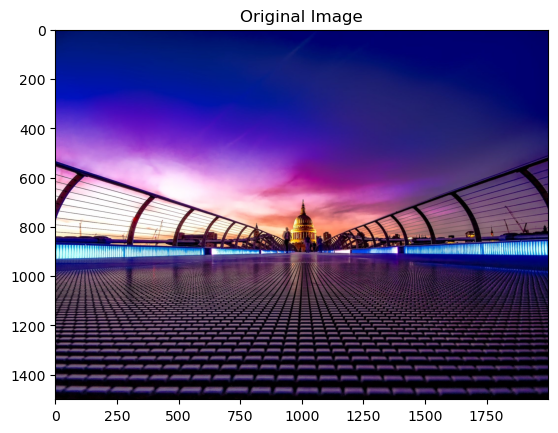

In [15]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") # Not a right solution will look into this later.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import clustering_algorithms
import time
from PyQt5 import Qt
import sys
import math

#from google.colab import files #use this if using google colab.

# if in-program feeding.
# image_path="Images//face.jpg"

# Browse an Image | Comment Colab browse. 
image_path=Qt.QFileDialog.getOpenFileName(None,'choose the file')[0]

"""
# if Using Colab | Comment in-app browsing
uploaded =files.upload()
image_path = list(uploaded.keys())[0]
"""

# Display the image: using in different contexts
def Display(Image,Alg):
    %matplotlib inline
    plt.title(Alg)
    plt.imshow(np.asarray(Image))
    
image = Image.open(image_path)
pixels = image.load()
width, height = image.size
#Logging Purpose
with open('logger.txt', 'a+') as out:
    out.write(f"""**Reading the Image**\n""")

# Display the Original image in notebook:
Display(image,"Original Image")

## Step 2: Map pixel values to vectors


In [16]:
vector_list = []
for y in range(height):
    vector_list.append([])
    for x in range(width):
        vector_list[y].append(list(pixels[x,y]))

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(width, height, len(vector_list)))

Image file with dimensions 2000x1500 pixels turned into 1500 vectors.


## Step 3: Perform clustering on the vectors

Using the clustering_algorithms methods dbscan and kmeans.
both methods taking input pixel vectors and respective hyperparameters.

User is free to perform which clustering he requires by default performing both.

In [18]:
start_time = time.time()
dbscan_clusters = clustering_algorithms.dbscan(vector_list, minpts=100, epsilon=100)
print("Time taken for DBScan "+str(round(time.time() - start_time))+" Seconds")
start_time = time.time()
kmeans_clusters = clustering_algorithms.kmeans(vector_list, 4)
print("Time taken for Kmeans "+str(round(time.time() - start_time))+" Seconds")

Time taken for DBScan 82 Seconds
Time taken for Kmeans 425 Seconds


In [19]:
#Function which reads clustered vector array and generates an image
def createImage(vectors: list):
    modelLen = len(vectors[0][0])
    #Check supported model and initialize image
    if modelLen == 3:
        image = Image.new('RGB', (len(vectors[0]),len(vectors)))
    elif modelLen == 4:
        image = Image.new('RGBA', (len(vectors[0]),len(vectors)))
    else:
        print("Unsupported model")
        sys.exit(1)

    #Map array values to image and save
    pixel = image.load()
    for y in range(len(vectors)):
        for x in range(len(vectors[0])):
            r = int(round(vectors[y][x][0]))
            g = int(round(vectors[y][x][1]))
            b = int(round(vectors[y][x][2]))
            if modelLen == 3:
                pixel[x,y] = (r,g,b)
            elif modelLen == 4:
                a = int(round(vectors[y][x][3]))
                pixel[x,y] = (r,g,b,a)        
    return image

## Step 4: Display the Segmented Images

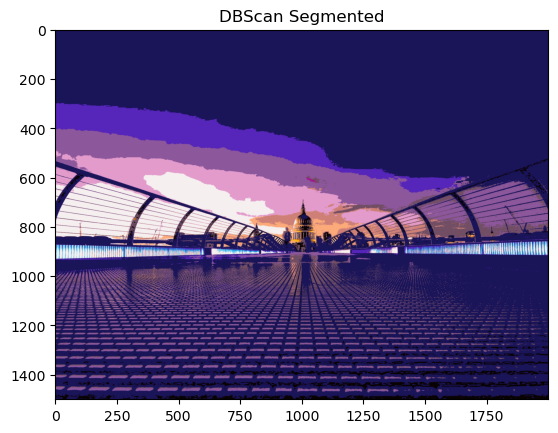

In [20]:
#DBScan Image
Display(createImage(dbscan_clusters),"DBScan Segmented")

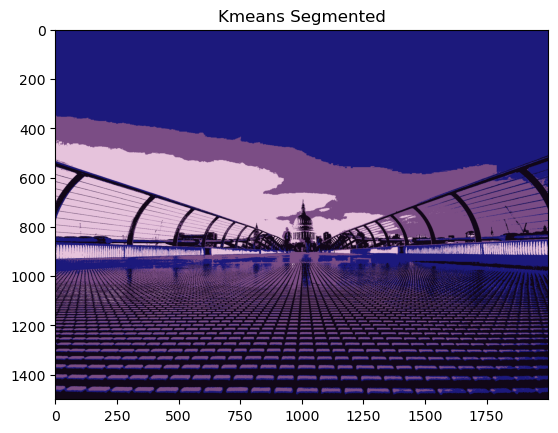

In [21]:
#Kmeans Image
Display(createImage(kmeans_clusters),"Kmeans Segmented")